# Setup

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Import Data

In [144]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

data_train['train_test'] = 1
data_test['train_test'] = 0
data_test['Transported'] = np.NaN
all_data = pd.concat([data_train, data_test])
all_data.head()

E:\Users\kbufn\AppData\Local\Temp\ipykernel_14800\241419670.py:7: FutureWarning: Behavior when concatenating bool-dtype and numeric-dtype arrays is deprecated; in a future version these will cast to object dtype (instead of coercing bools to numeric values). To retain the old behavior, explicitly cast bool-dtype arrays to numeric dtype.
  all_data = pd.concat([data_train, data_test])


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,train_test
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0.0,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1.0,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0.0,1
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0.0,1
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1.0,1


# Preview the dataset

In [145]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  train_test    8693 non-null   int64  
dtypes: bool(1), float64(6), int64(1), object(7)
memory usage: 959.4+ KB


In [146]:
data_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,train_test
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8693.0
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791,1.0
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000,1.0
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.0


In [147]:
#Convert True/False to 1/0
#data_train['Transported'] = data_train['Transported'].astype(int)

In [148]:
#Get the categorical data
#df_cat = data_train[['PassengerId','HomePlanet','Cabin','Destination','Name','VIP','CryoSleep','Transported']]
df_cat = all_data.select_dtypes(include=['object','bool'])
#Get the numerical data
#df_num = data_train[['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']]
df_num = all_data.select_dtypes(include=['float64','int64']).drop(['train_test','Transported'], axis=1)

# df_num['Transported'] = df_num['Transported'].astype(int)
# df_num['VIP'] = df_num['VIP'].astype(int)
# df_num['CryoSleep'] = df_num['CryoSleep'].astype(int)

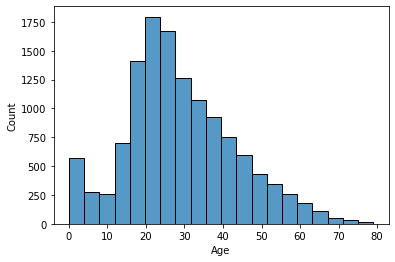

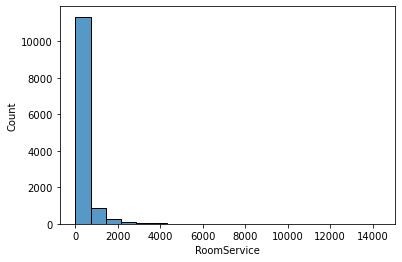

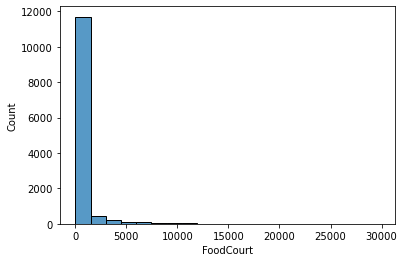

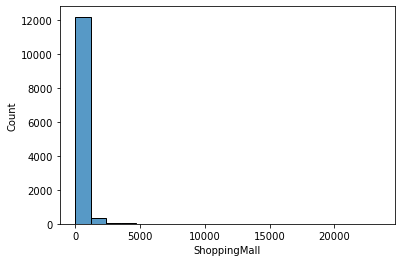

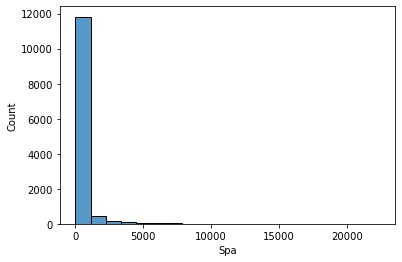

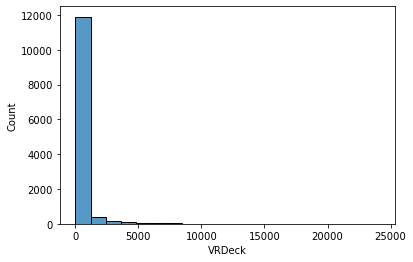

In [149]:
for i in df_num.columns:
    sns.histplot(df_num[i],bins=20)
    plt.show()

                   Age  RoomService  FoodCourt  ShoppingMall       Spa  \
Age           1.000000     0.067300   0.124447      0.034959  0.118992   
RoomService   0.067300     1.000000  -0.020146      0.057402  0.008936   
FoodCourt     0.124447    -0.020146   1.000000     -0.001589  0.228990   
ShoppingMall  0.034959     0.057402  -0.001589      1.000000  0.010504   
Spa           0.118992     0.008936   0.228990      0.010504  1.000000   
VRDeck        0.101441    -0.023847   0.244279      0.004485  0.149874   

                VRDeck  
Age           0.101441  
RoomService  -0.023847  
FoodCourt     0.244279  
ShoppingMall  0.004485  
Spa           0.149874  
VRDeck        1.000000  


<AxesSubplot:>

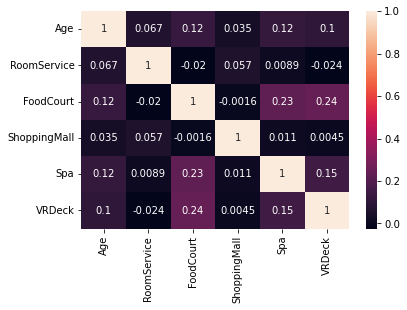

In [150]:
#Compute pairwise correlation of columns
print(df_num.corr())
#Create the heatmap based on the correlation
sns.heatmap(data = df_num.corr(), annot = True)

In [151]:
pd.pivot_table(data_train, index = 'Transported', values = df_num.columns)

,Age,FoodCourt,RoomService,ShoppingMall,Spa,VRDeck
Transported,,,,,,
False,29.922858,382.615930,389.266066,167.566217,564.382666,543.629822
True,27.748834,532.691984,63.098021,179.829972,61.675531,69.148131


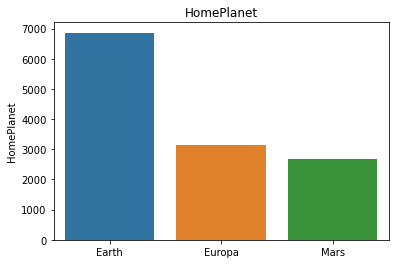

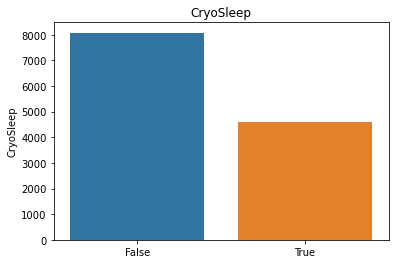

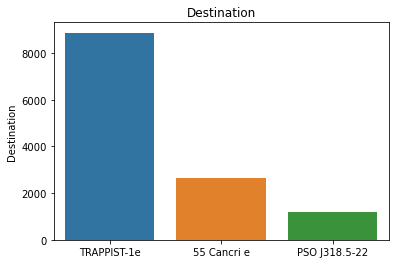

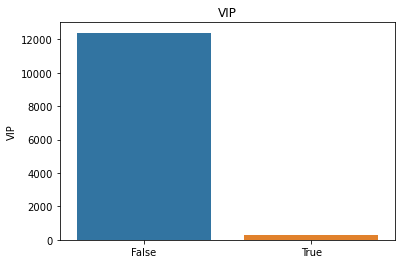

In [152]:
for i in df_cat.columns.drop(['PassengerId','Name','Cabin']):
    sns.barplot(x = df_cat[i].value_counts().index, y = df_cat[i].value_counts()).set_title(i)
    plt.show()

In [153]:
print(pd.pivot_table(data_train, index = 'Transported', columns='VIP', values= 'PassengerId', aggfunc='count'))
print()
print(pd.pivot_table(data_train, index = 'Transported', columns='Destination', values= 'PassengerId', aggfunc='count'))
print()
print(pd.pivot_table(data_train, index = 'Transported', columns='CryoSleep', values= 'PassengerId', aggfunc='count'))
print()
print(pd.pivot_table(data_train, index = 'Transported', columns='HomePlanet', values= 'PassengerId', aggfunc='count'))

VIP          False  True
Transported             
False         4093   123
True          4198    76

Destination  55 Cancri e  PSO J318.5-22  TRAPPIST-1e
Transported                                         
False                702            395         3128
True                1098            401         2787

CryoSleep    False  True
Transported             
False         3650   554
True          1789  2483

HomePlanet   Earth  Europa  Mars
Transported                     
False         2651     727   839
True          1951    1404   920


# Feature Engineering

In [154]:
all_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,train_test
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0.0,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1.0,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0.0,1
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0.0,1
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1.0,1


In [155]:
all_data[['Deck', 'Num', 'Side']] = (
    all_data['Cabin'].str.split('/', expand= True)
)

all_data[['Group','GroupNumber']] = (all_data['PassengerId'].str.split('_', expand=True))

In [156]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   float64
 14  train_test    12970 non-null  int64  
 15  Deck          12671 non-null  object 
 16  Num           12671 non-null  object 
 17  Side          12671 non-null  object 
 18  Group         12970 non-nul

In [157]:
df_cat = list(all_data.select_dtypes(include=['object','bool']).columns)
mask = list(all_data[df_cat].nunique()<50)
df_cat = [b for a,b in zip(mask,df_cat) if a]


In [158]:
df_num = list(all_data.select_dtypes(include=['float64','int64']).columns)

In [159]:
all_data[df_cat].nunique()

HomePlanet     3
CryoSleep      2
Destination    3
VIP            2
Deck           8
Side           2
GroupNumber    8
dtype: int64

# Data Preprocessing

In [160]:
all_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,train_test,Deck,Num,Side,Group,GroupNumber
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0.0,1,B,0,P,0001,01
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1.0,1,F,0,S,0002,01
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0.0,1,A,0,S,0003,01
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0.0,1,A,0,S,0003,02
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1.0,1,F,1,S,0004,01


In [161]:
missing_values_count = all_data.isnull().sum()
total_cells = np.product(all_data.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells)*100
percent_missing

3.32112567463377

In [162]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df_num_imputed = pd.DataFrame(imputer.fit_transform(all_data[df_num]), columns= all_data[df_num].columns)

In [163]:
ohe = OneHotEncoder(sparse=False)

df_cat_encoded = pd.DataFrame(ohe.fit_transform(all_data[df_cat]), index = all_data[df_cat].index)

In [164]:
all_data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'train_test', 'Deck', 'Num', 'Side', 'Group',
       'GroupNumber'],
      dtype='object')

In [165]:
df_cat_encoded.reset_index(drop=True ,inplace=True)
df_num_imputed.reset_index(drop=True,inplace=True)


all_data = pd.concat([df_cat_encoded, df_num_imputed], axis=1)
all_data.columns = all_data.columns.astype(str)

#all_data.drop('index', axis=1)

In [166]:
#Split to train and test again

X_train = all_data[all_data.train_test == 1].drop(['train_test'], axis = 1)
y_train = X_train.pop('Transported')

X_test = all_data[all_data.train_test == 0].drop(['train_test'], axis = 1)
X_test.drop(columns='Transported',inplace=True)

In [167]:
all_data.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', 'Age',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'train_test'],
      dtype='object')

# Model building

In [168]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [169]:
gnb = GaussianNB()
cv = cross_val_score(gnb,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.74123059 0.74525589 0.77285796 0.78481013 0.75546605]
0.7599241260700996


In [170]:
lr = LogisticRegression(max_iter= 2000)
cv = cross_val_score(lr, X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.7786084  0.78723404 0.79930995 0.78423475 0.79286536]
0.7884505003007563


In [171]:
dt = tree.DecisionTreeClassifier()
cv = cross_val_score(dt, X_train, y_train,cv=5)
print(cv)
print(cv.mean())

[0.71937895 0.73260495 0.74640598 0.72497123 0.73878021]
0.7324282635351851


In [172]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.77055779 0.77285796 0.7613571  0.76869965 0.78941312]
0.7725771262533988


In [173]:
rf = RandomForestClassifier()
cv = cross_val_score(rf, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.76825762 0.78780909 0.78435883 0.78941312 0.79746835]
0.7854614009744632


In [174]:
svc = SVC(probability= True)
cv = cross_val_score(svc, X_train, y_train,cv=5)
print(cv)
print(cv.mean())

[0.76883266 0.77228292 0.78953422 0.80034522 0.79919448]
0.7860378999080858


In [175]:
xgb = XGBClassifier()
cv = cross_val_score(xgb, X_train, y_train,cv=5)
print(cv)
print(cv.mean())

[0.77515814 0.78780909 0.79758482 0.81070196 0.79574223]
0.793399246025155


In [176]:
gbc = GradientBoostingClassifier()
cv = cross_val_score(gbc, X_train, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.78378378 0.79298447 0.80046003 0.81530495 0.79804373]
0.798115393752345


In [177]:
catboost = CatBoostClassifier(verbose=0)
cv = cross_val_score(catboost, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.78148361 0.79528465 0.80448534 0.82220944 0.8009206 ]
0.8008767257083982


In [178]:
ridge = RidgeClassifier()
cv = cross_val_score(ridge, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.76250719 0.77573318 0.76480736 0.77100115 0.77560414]
0.7699306044040759


In [179]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators= [('gnb',gnb),('lr',lr),('rf',rf),('svc',svc),('xgb',xgb),('gbc',gbc),('catboost',catboost),('ridge',ridge)], voting='hard')

In [180]:
cv = cross_val_score(voting_clf, X_train, y_train, cv = 5, error_score='raise')
print(cv)
print(cv.mean())

[0.78550891 0.79125934 0.80391029 0.81472957 0.80494822]
0.8000712682910367


In [181]:
#0.79949 previously

# Model Tune

In [182]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

In [183]:
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [184]:
lr = LogisticRegression()
param_grid = [
    {'max_iter': [1500,1700,2000],
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear']
    }, 
    {'max_iter': [2000],
    'penalty': ['l2', 'none'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['lbfgs']
    }]

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_train,y_train)
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 160 candidates, totalling 800 fits
Logistic Regression
Best Score: 0.7905219128488723
Best Parameters: {'C': 0.03359818286283781, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


In [185]:
rf = RandomForestClassifier()
param_grid = {
    'n_estimators': [100,150],
    'class_weight': ['balanced_subsample', None],
    'max_depth': [8,16,24],
    'min_samples_split': [2,4,6],
    'min_samples_leaf': [3,4,5],
    'max_features': ['sqrt', 'log2']
}
clf_rf = GridSearchCV(rf, param_grid=param_grid, cv=5, verbose= True, n_jobs=-1)
best_clf_rf = clf_rf.fit(X_train,y_train)
clf_performance(best_clf_rf,'rf')

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
rf
Best Score: 0.799496225162802
Best Parameters: {'class_weight': None, 'max_depth': 24, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 150}


In [186]:
svc = SVC(probability = True)
param_grid = {
    'kernel': ['rbf'],
    'gamma': ['scale'],
    'C': [1.05, 1.1,1.15]
    }
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_train,y_train)
clf_performance(best_clf_svc,'SVC')

Fitting 5 folds for each of 3 candidates, totalling 15 fits
SVC
Best Score: 0.7866131415552368
Best Parameters: {'C': 1.15, 'gamma': 'scale', 'kernel': 'rbf'}


In [187]:
gbc = GradientBoostingClassifier()
param_grid = {
    'loss' :['deviance','exponential'],
    'learning_rate':[0.05,0.1,0.15],
    'n_estimators':[100,150,200],
    'min_samples_leaf':[2,3,4],
    'max_depth':[3,4,5]
}
clf_gbc = GridSearchCV(gbc, param_grid=param_grid, cv=5, verbose=True, n_jobs=-1)
best_clf_gbc = clf_gbc.fit(X_train, y_train)
clf_performance(best_clf_gbc,'gbc')

Fitting 5 folds for each of 162 candidates, totalling 810 fits
gbc
Best Score: 0.8008760639786765
Best Parameters: {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'min_samples_leaf': 3, 'n_estimators': 150}


In [188]:
ridge = RidgeClassifier()
param_grid = {
            'alpha': np.logspace(-4, 4, 20)
            }
clf_ridge = GridSearchCV(ridge, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_ridge = clf_ridge.fit(X_train,y_train)
clf_performance(best_clf_ridge,'ridge')

Fitting 5 folds for each of 20 candidates, totalling 100 fits
ridge
Best Score: 0.7837352128222045
Best Parameters: {'alpha': 3792.690190732246}


# Model Additional Ensemble Approaches

In [189]:
best_lr = best_clf_lr.best_estimator_
best_rf = best_clf_rf.best_estimator_
best_svc = best_clf_svc.best_estimator_
best_ridge = best_clf_ridge.best_estimator_
best_gbc = best_clf_gbc.best_estimator_

voting_clf_hard = VotingClassifier(estimators=[('best_lr',best_lr),('best_rf',best_rf),('best_svc', best_svc),('best_gbc', best_gbc),('best_ridge',best_ridge),('catboost',catboost)], voting='hard')
# 'RidgeClassifier' object has no attribute 'predict_proba'
voting_clf_soft = VotingClassifier(estimators=[('best_lr',best_lr),('best_rf',best_rf),('best_svc', best_svc),('best_gbc', best_gbc),('catboost',catboost)], voting='soft')

cv = cross_val_score(voting_clf_hard,X_train,y_train,cv=5)
print('voting_clf_hard :',cv)
print('voting_clf_hard mean :',cv.mean())

cv = cross_val_score(voting_clf_soft,X_train,y_train,cv=5)
print('voting_clf_soft :',cv)
print('voting_clf_soft mean :',cv.mean())

voting_clf_hard : [0.78550891 0.79528465 0.80736055 0.81703107 0.80207135]
voting_clf_hard mean : 0.8014513056258277
voting_clf_soft : [0.78780909 0.79298447 0.80103508 0.82278481 0.80264672]
voting_clf_soft mean : 0.8014520335285216


In [190]:
# 79880, 797310
# 79788, 799841 no gnb
# 80122, 801567 caboost

In [191]:
voting_clf_hard.fit(X_train, y_train)
voting_clf_soft.fit(X_train, y_train)

VotingClassifier(estimators=[('best_lr',
                              LogisticRegression(C=0.03359818286283781,
                                                 max_iter=2000, penalty='l1',
                                                 solver='liblinear')),
                             ('best_rf',
                              RandomForestClassifier(max_depth=24,
                                                     max_features='sqrt',
                                                     min_samples_leaf=3,
                                                     min_samples_split=4,
                                                     n_estimators=150)),
                             ('best_svc', SVC(C=1.15, probability=True)),
                             ('best_gbc',
                              GradientBoostingClassifier(min_samples_leaf=3,
                                                         n_estimators=150)),
                             ('catboost',
                        

In [192]:
y_hat_vc_hard = voting_clf_hard.predict(X_test).astype(int)
y_hat_vc_soft = voting_clf_soft.predict(X_test).astype(int)

In [193]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
8693,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0
8694,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,19.0,0.0,9.0,0.0,2823.0,0.0
8695,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,31.0,0.0,0.0,0.0,0.0,0.0
8696,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,38.0,0.0,6652.0,0.0,181.0,585.0
8697,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,20.0,10.0,0.0,635.0,0.0,0.0


In [194]:
final_data = {'PassengerId': data_test.PassengerId, 'Transported': y_hat_vc_hard.astype(bool)}
submission1 = pd.DataFrame(data = final_data)

final_data2 = {'PassengerId': data_test.PassengerId, 'Transported': y_hat_vc_soft.astype(bool)}
submission2 = pd.DataFrame(data = final_data)

In [195]:
submission1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  4277 non-null   object
 1   Transported  4277 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 37.7+ KB


In [196]:
submission1.to_csv('submission_hard.csv', index=False)
submission2.to_csv('submission_soft.csv', index=False)